<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 1** 
## CASO: Estimando o Preço de Imóveis em São Paulo
---
<br>
<br>





A partir deste notebook crie um modelo de regressão múltipla com a biblioteca `statsmodels` para predição de preço de imóveis com base no histórico de preços e características de vários imóveis de São Paulo. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados

Entenda os dados disponíveis e em seguida faça as transformações necessárias nos dados. Quantidades dos dados, se existem valores nulos e valores máximos e mínimos dos atributos são algumas explorações comuns. 

(Moodle) **Q1**. Quantos bairros existem no histórico e qual o bairro mais presente nos dados?



In [2]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [3]:
df.describe() # Cálculos estatísticos

,areaM2,suites,dormitorios,banheiros,vagas,preco
count,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
mean,140.343758,1.700882,2.946271,3.095429,2.225341,1.553746e+06
std,60.051791,0.994945,0.759292,1.372859,1.000940,1.073607e+06
min,20.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+05
25%,94.000000,1.000000,3.000000,2.000000,1.000000,8.500000e+05
50%,130.000000,1.000000,3.000000,3.000000,2.000000,1.200000e+06
75%,180.000000,2.000000,3.000000,4.000000,3.000000,1.880000e+06
max,299.000000,6.000000,6.000000,9.000000,5.000000,8.000000e+06


In [4]:
item_counts = df["bairro"].value_counts()
print(item_counts)

vila-mariana           1714
paraiso                 802
vila-nova-conceicao     789
vila-sonia              307
morumbi                 129
Name: bairro, dtype: int64


In [5]:
df.bairro.nunique()

5

**Resposta da Q1:** Existem 5 bairros na lista e o bairro mais presente é o Vila Mariana

# Preparação dos Dados

Use [statsmodels.formula.api](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

```
from statsmodels.formula.api import ols   
```

Se você empregar esta forma do `statsmodels` ele fará de modo implítico o hot encode dos dados e não há necessidade de nenhuma transformação dos dados (não faremos a normalização aqui. Embora sempre recomendável na maior parte dos casos, aqui o resultado de predição será o mesmo com o sem a normalização).

Atenção, se você empregar 
```
from statsmodels.api import OLS 
```
os resultados serão os mesmos, mas alguma preparação nos dados será necessária e a construção do modelo será um pouco diferente.

In [ ]:
from statsmodels.formula.api import ols   

# nada a fazer se estiver empregando a api acima

# Estimando o modelo com o `statsmodels`

Estime o modelo.

(Moodle) **Q2**. Qual o coeficiente de determinação ajustado obtido?

Dica: empregue `result.rsquared_adj` no lugar de `result.summary()` para obter resultados com maior precisão.

(Moodle) **Q3**. Qual coeficiente estimado é menos significativo?

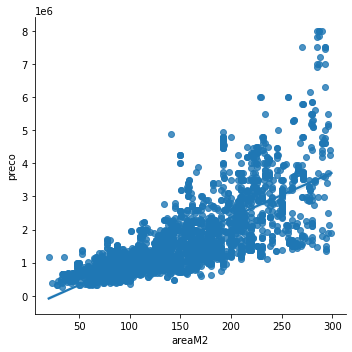

In [6]:
sns.lmplot(x='areaM2', y='preco', data = df)
plt.show()

In [8]:
import statsmodels.formula.api as sm
import statsmodels.api as smapi

In [9]:
verification = sm.ols(formula = 'preco ~ areaM2', data=df )

result = verification.fit()

print(result.summary())
print(result.rsquared_adj)
print(result.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     5107.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:09:15   Log-Likelihood:                -55646.
No. Observations:                3741   AIC:                         1.113e+05
Df Residuals:                    3739   BIC:                         1.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.527e+05    2.9e+04    -12.156      0.0

**Resposta da Q2:** O coeficiente é 57,73%

**Resposta da Q3:**O coeficiente menos significativo é o da regressão linear

# Re-estimando o modelo com o `statsmodels`

Estime novamente o modelo excluindo o atributo menos significativo (um único atributo). 

(Moodle) **Q4**. Qual o novo coeficiente de determinação ajustado obtido?


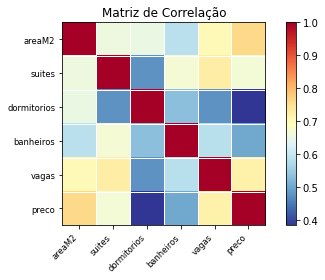

In [10]:
import statsmodels.formula.api as sm 
correlacao = df.corr()
#plotar correlação
smapi.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

In [11]:
model_3 = sm.ols(formula = 'preco ~ areaM2 + suites + dormitorios + bairro + vagas', data=df )

result_3 = model_3.fit()

print(result_3.summary())
print(result_3.rsquared_adj)
print(result_3.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:22:20   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Resposta da Q4:**O coeficiente é 79,48%

# Predição

Faça a predição do preço, com o melhor dos modelos obtidos acima, de um imóvel na Vila Mariana, com 134 m2, 1 suite, 4 dorm, 3 banheiros e 3 vagas.



(Moodle) **Q5**. Qual o preço estimado, para o melhor dos modelos obtidos, de um imóvel na Vila Mariana, com 134 m2, 1 suite, 4 dorm, 3 banheiros e 3 vagas?



In [12]:
data = {'areaM2': [134],
        'bairro':['vila-mariana'],
        'suites': [1],
        'dormitorios': [4],
        'banheiros':[3],
        'vagas':[3]
        }
  
x = pd.DataFrame(data)

output = result_3.predict(x)
print(float(output))

1350584.8039723947


**Resposta Q5:** O preço estimado foi R$ 1.350.584,80.